In [1]:
# given a vector of 10 floating point numbers, convert them to integers using int() and print the resulting list.
# First do rounding to the nearest integer, then convert to lower integer, then to upper integer.
import numpy as np  
vector = np.random.rand(10) * 100  # Generate a vector of 10 random floating point numbers
print("Original vector:", vector)
# Rounding to the nearest integer by using int(), add 0.5 before converting
rounded_vector = np.floor(vector + 0.5).astype(int)
print("Rounded vector using numpy:", rounded_vector)
# now convert to lower integer using int() 
lower_vecot = np.floor(vector).astype(int)
print("Lower integer vector using numpy:", lower_vecot)
# now convert to upper integer using int()
upper_vector = np.ceil(vector).astype(int)
print("Upper integer vector using numpy:", upper_vector)


Original vector: [49.05848545 61.3999633  13.18678252 61.11678889 49.08162911 69.62663209
 91.70394005 37.68852599 96.51752685 61.87663958]
Rounded vector using numpy: [49 61 13 61 49 70 92 38 97 62]
Lower integer vector using numpy: [49 61 13 61 49 69 91 37 96 61]
Upper integer vector using numpy: [50 62 14 62 50 70 92 38 97 62]


In [2]:
# define a large float number and express it using 16 bits, 32 bits and 64 bits using numpy.
large_float = 123456789.123456789
float_16 = np.float16(large_float)
float_32 = np.float32(large_float)
float_64 = np.float64(large_float)
print("Original large float:", large_float)
print("16-bit float representation:", float_16)
print("32-bit float representation:", float_32)
print("64-bit float representation:", float_64)

Original large float: 123456789.12345679
16-bit float representation: inf
32-bit float representation: 123456790.0
64-bit float representation: 123456789.12345679


/tmp/ipykernel_287315/1249885812.py:3: RuntimeWarning: overflow encountered in cast
  float_16 = np.float16(large_float)


In [12]:
# take a large number and express it in scientific notation with 5 decimal places.
large_number = 9876543210.123456789
sci_5 = "{:.5e}".format(large_number)
print("type of sci_5:", type(sci_5))
print("Scientific notation with 5 decimal places:", sci_5) 



type of sci_5: <class 'str'>
Scientific notation with 5 decimal places: 9.87654e+09


In [17]:
# now show the mantissa and exponent parts separately in decimal and binary.
mantissa, exponent = sci_5.split('e')
print("Mantissa (decimal):", mantissa)
print("Mantissa (binary):", bin(int(float(mantissa) * (10**5))))
print("Exponent (decimal):", exponent)
print("Exponent (binary):", bin(int(exponent))) 

Mantissa (decimal): 9.87654
Mantissa (binary): 0b11110001001000000110
Exponent (decimal): +09
Exponent (binary): 0b1001


In [5]:
# how many binary digits you need for each part above?
mantissa_decimal = float(mantissa)
exponent_decimal = int(exponent)    
mantissa_binary = bin(int(mantissa_decimal * (10**5)))
exponent_binary = bin(exponent_decimal) 
print("Number of binary digits for mantissa:", len(mantissa_binary) - 2)  # Subtract 2 for '0b' prefix
print("Number of binary digits for exponent:", len(exponent_binary) - 2)    

Number of binary digits for mantissa: 20
Number of binary digits for exponent: 4


## How small is epsilon

In [6]:
eps = np.finfo(float).eps  # machine epsilon for IEEE-754 double

print("machine epsilon =", eps)
print("1 + eps   > 1 ?", (1.0 + eps) > 1.0)
print("1 + eps/2 > 1 ?", (1.0 + eps/2) > 1.0)


machine epsilon = 2.220446049250313e-16
1 + eps   > 1 ? True
1 + eps/2 > 1 ? False


In [11]:
import sys
import numpy as np
import struct

print("=== Python built-in float ===")
print("Size (bytes):", struct.calcsize("d"))
print("Bits        :", struct.calcsize("d") * 8)
print("Epsilon     :", sys.float_info.epsilon)
print()

print("=== NumPy float32 ===")
print("Bits        :", np.finfo(np.float32).bits)
print("Epsilon     :", np.finfo(np.float32).eps)
print()

print("=== NumPy float64 ===")
print("Bits        :", np.finfo(np.float64).bits)
print("Epsilon     :", np.finfo(np.float64).eps)


=== Python built-in float ===
Size (bytes): 8
Bits        : 64
Epsilon     : 2.220446049250313e-16

=== NumPy float32 ===
Bits        : 32
Epsilon     : 1.1920929e-07

=== NumPy float64 ===
Bits        : 64
Epsilon     : 2.220446049250313e-16


### When working with large numbers, small numbers disapper

In [7]:
a = 1e16
b = a + 1.0
c = b - a

print("a =", format(a, ".1f"))
print("b = a + 1 =", format(b, ".1f"), "(the +1 is lost)")
print("c = (a + 1) - a =", c, "(should be 1)")


a = 10000000000000000.0
b = a + 1 = 10000000000000000.0 (the +1 is lost)
c = (a + 1) - a = 0.0 (should be 1)


### repeated round off errors add up

In [8]:
n = 1_000_000
small = 1e-8

s = 0.0
for _ in range(n):
    s += small

expected = n * small
print("Expected:", format(expected, ".17f"))
print("Sum     :", format(s, ".17f"))
print("Absolute error:", abs(s - expected))


Expected: 0.01000000000000000
Sum     : 0.00999999999994859
Absolute error: 5.140853021057268e-14


In [18]:
# use the function below to estimate the error for a exponential function approximation.
import math
def itermeth(x,es=1e-4,maxit=50):
    """
    Maclaurin series expansion of the exponential function
    requires math module
    input:
        x = value at which the series is evaluated
        es = stopping criterion (default = 1e-4)
        maxit = maximum number of iterations (default=10)
    output:
        fx = estimated function value
        ea = approximate relative error (%)
        iter = number of iterations
    """
    # initialization
    iter = 1 ; sol = 1 ; ea = 100
    # iterative calculation
    while True:
        solold = sol
        sol = sol + x**iter / math.factorial(iter)
        iter = iter + 1
        if sol != 0: ea = abs((sol-solold)/sol)*100
        if ea < es or iter == maxit: break
    fx = sol
    return fx,ea,iter


In [19]:
fx,ea,iter = itermeth(1,1e-7,100)
print(f"Estimated e^{1} = {fx} in {iter} iterations with approximate error {ea}%")  


Estimated e^1 = 2.7182818282861687 in 13 iterations with approximate error 7.680130103798932e-08%


In [20]:
fx,ea,iter = itermeth(0.5,1e-7,100)
print(f"Estimated e^{0.5} = {fx} in {iter} iterations with approximate error {ea}%")  

Estimated e^0.5 = 1.6487212706873655 in 11 iterations with approximate error 1.632262003529942e-08%


In [22]:
# print the error iteration by iteration for x=1 and niter=10
for i in range(1,11):
    fx,ea,iter = itermeth(0.5,1e-7,i+1)
    print(f"Iteration {i} with {i+1} terms: Estimated e^{0.5} = {fx} with approximate error {ea}%")

Iteration 1 with 2 terms: Estimated e^0.5 = 1.5 with approximate error 33.33333333333333%
Iteration 2 with 3 terms: Estimated e^0.5 = 1.625 with approximate error 7.6923076923076925%
Iteration 3 with 4 terms: Estimated e^0.5 = 1.6458333333333333 with approximate error 1.2658227848101222%
Iteration 4 with 5 terms: Estimated e^0.5 = 1.6484375 with approximate error 0.157977883096371%
Iteration 5 with 6 terms: Estimated e^0.5 = 1.6486979166666667 with approximate error 0.015795293002684303%
Iteration 6 with 7 terms: Estimated e^0.5 = 1.6487196180555554 with approximate error 0.0013162570913293932%
Iteration 7 with 8 terms: Estimated e^0.5 = 1.6487211681547618 with approximate error 9.40182752709793e-05%
Iteration 8 with 9 terms: Estimated e^0.5 = 1.6487212650359622 with approximate error 5.876141859145755e-06%
Iteration 9 with 10 terms: Estimated e^0.5 = 1.648721270418251 with approximate error 3.264523199531576e-07%
Iteration 10 with 11 terms: Estimated e^0.5 = 1.6487212706873655 with ap

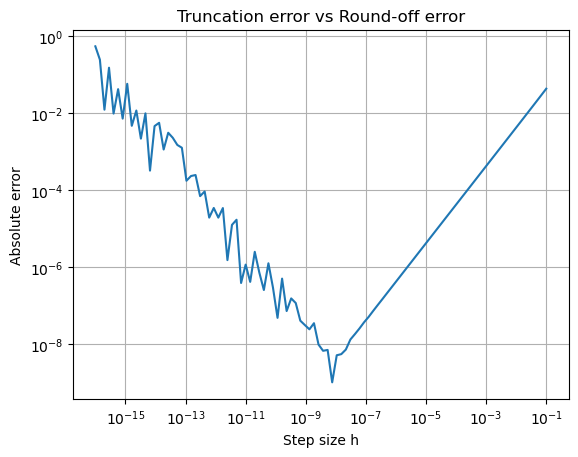

In [23]:
# example to illustrate the difference between truncation error and rounding error.
import numpy as np
import matplotlib.pyplot as plt

# Function and exact derivative
f = np.sin
df_exact = np.cos

x0 = 1.0
true_value = df_exact(x0)

# Step sizes (log-spaced)
h = np.logspace(-16, -1, 100)

# Forward finite difference
df_numeric = (f(x0 + h) - f(x0)) / h

# Absolute error
error = np.abs(df_numeric - true_value)

# Plot
plt.loglog(h, error)
plt.xlabel("Step size h")
plt.ylabel("Absolute error")
plt.title("Truncation error vs Round-off error")
plt.grid(True, which="both")
plt.show()


### Example Taylor series 
Approximate the value of f(x) at x =1 using Taylor series expansion with a base point of x = 0 for
f(x) = -0.1 x^4 - 0.15 x^3 - 0.5 x^2 - 0.25 x + 1.2 

In [2]:
# Approximate the value of f(x) at x =1 using Taylor series expansion with a base point of x = 0 for 
# f(x) = -0.1 x^4 - 0.15 x^3 - 0.5 x^2 - 0.25 x + 1.2 
import math
def f(x):
    return -0.1 * x**4 - 0.15 * x**3 - 0.5 * x**2 - 0.25 * x + 1.2

def derivative(func, point, order):
    if order == 0:
        return func(point)
    else:
        h = 1e-5
        return (derivative(func, point + h, order - 1) - derivative(func, point - h, order - 1)) / (2 * h)

def taylor_series(f, x, a, n):
    """
    Compute the Taylor series expansion of f at point x around base point a up to n terms.  
    """
    result = 0
    for i in range(n):
        # Compute the i-th derivative at point a
        deriv = derivative(f, a, i)
        term = deriv / math.factorial(i) * (x - a)**i
        result += term
    return result   

x = 1.0
a = 0.0
exact_value = f(x)
print("Exact value at x=1:", exact_value)
for n in range(1, 6):
    approx_value = taylor_series(f, x, a, n)
    error = abs(approx_value - exact_value)
    print(f"n={n}: Approximate value = {approx_value}, Absolute error = {error}")
    

Exact value at x=1: 0.19999999999999996
n=1: Approximate value = 1.2, Absolute error = 1.0
n=2: Approximate value = 0.9499999999872599, Absolute error = 0.74999999998726
n=3: Approximate value = 0.44999995861638054, Absolute error = 0.24999995861638058
n=4: Approximate value = 0.2973443042943195, Absolute error = 0.09734430429431956
n=5: Approximate value = 0.2976334364384722, Absolute error = 0.09763343643847222


In [ ]:
def derivative(func, point, order):
    if order == 0:
        return func(point)
    else:
        h = 1e-5
        return (derivative(func, point + h, order - 1)
              - derivative(func, point - h, order - 1)) / (2 * h)

def taylor_series(f, x, a, n):
    result = 0
    for i in range(n):
        deriv = derivative(f, a, i)
        term = deriv / math.factorial(i) * (x - a)**i
        result += term
    return result


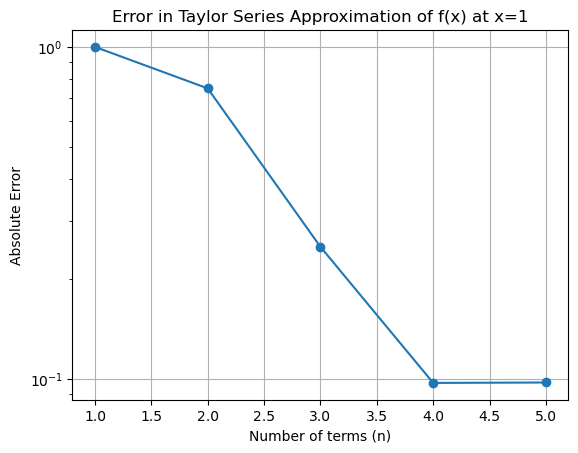

In [32]:
# plot the previous resulst using matplotlib.
import matplotlib.pyplot as plt 
n_values = list(range(1, 6))
errors = []
for n in n_values:
    approx_value = taylor_series(f, x, a, n)
    error = abs(approx_value - exact_value)
    errors.append(error)    
plt.plot(n_values, errors, marker='o')
plt.yscale('log')
plt.xlabel('Number of terms (n)')
plt.ylabel('Absolute Error')
plt.title('Error in Taylor Series Approximation of f(x) at x=1')
plt.grid(True)
plt.show()  

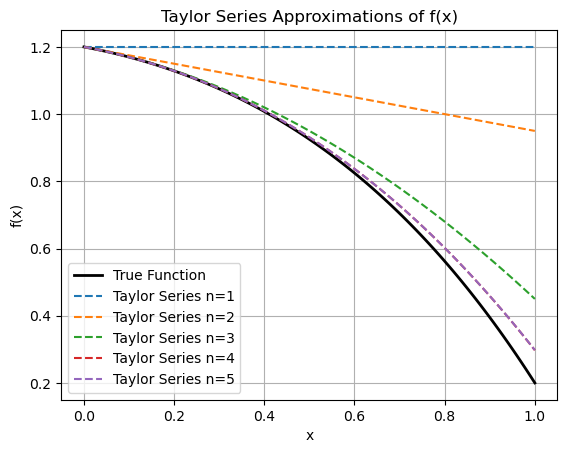

In [33]:
# plot the value of f(x) from x=0 to x=1 using matplotlib for the true function and the Taylor series approximations with n=1 to n=5.
import numpy as np  
import matplotlib.pyplot as plt 
x_values = np.linspace(0, 1, 100)
true_values = f(x_values)
plt.plot(x_values, true_values, label='True Function', color='black', linewidth=2)
for n in range(1, 6):
    approx_values = [taylor_series(f, x, a, n) for x in x_values]
    plt.plot(x_values, approx_values, label=f'Taylor Series n={n}', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Taylor Series Approximations of f(x)')
plt.legend()
plt.grid(True)
plt.show()  

# ADDITIONAL MATERIAL (may not cover in labs)

## Example of a Taylor series using symbolic py

In [24]:
import sympy as sp

# Define symbol
x = sp.symbols('x')

# Define function
f = sp.sin(x)

# Taylor (Maclaurin) series up to x^7
taylor = sp.series(f, x, 0, 8)

print(taylor)


x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)


In [25]:
# Remove the big-O term
taylor_poly = sp.series(f, x, 0, 8).removeO()

# Convert to numerical function
f_taylor = sp.lambdify(x, taylor_poly, 'numpy')
f_exact = sp.lambdify(x, f, 'numpy')

# Test value
x0 = 0.5

print("Exact     :", f_exact(x0))
print("Taylor    :", f_taylor(x0))
print("Error     :", abs(f_exact(x0) - f_taylor(x0)))


Exact     : 0.479425538604203
Taylor    : 0.479425533234127
Error     : 5.370075994992618e-09


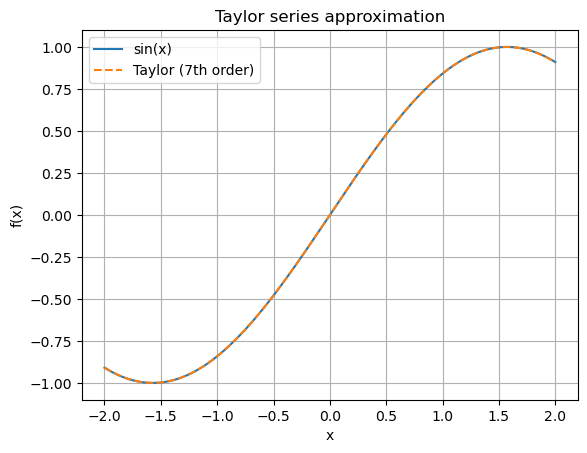

In [26]:
import numpy as np
import matplotlib.pyplot as plt

xv = np.linspace(-2, 2, 400)

plt.plot(xv, f_exact(xv), label='sin(x)')
plt.plot(xv, f_taylor(xv), '--', label='Taylor (7th order)')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Taylor series approximation')
plt.grid(True)
plt.show()


## Review finite difference (central vs forward)

In [27]:
import numpy as np

# Function and derivative
f = np.sin
df_exact = np.cos

x0 = 1.0
h = 1e-2

df_forward = (f(x0 + h) - f(x0)) / h
df_central = (f(x0 + h) - f(x0 - h)) / (2*h)
df_true = df_exact(x0)

print("Exact     :", df_true)
print("Forward   :", df_forward)
print("Central   :", df_central)


Exact     : 0.5403023058681398
Forward   : 0.536085981011869
Central   : 0.5402933008747335


## Sympy
SymPy separates symbolic math from numerical evaluation, allowing exact derivatives, simplification, and algebra before plugging in numbers.

In [28]:
# use sympy to calculate the derivate of the exponential function
import sympy as sp
import random
x = sp.symbols('x')
phi = 1/sp.sqrt(2*sp.pi) * sp.exp(-x**2/2)
dphi = sp.diff(phi, x)
print("function phi(x):", phi)
print("Derivative of exp(x):", dphi)
x = random.uniform(-5,5)
phi_val = phi.subs(sp.symbols('x'), x)
dphi_val = dphi.subs(sp.symbols('x'), x)
print(f"At x={x}, phi(x)={phi_val}, dphi/dx={dphi_val}")



function phi(x): sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))
Derivative of exp(x): -sqrt(2)*x*exp(-x**2/2)/(2*sqrt(pi))
At x=-1.7839980823839872, phi(x)=0.10182783748611*sqrt(2)/sqrt(pi), dphi/dx=0.181660666808528*sqrt(2)/sqrt(pi)
